In [ ]:
import tensorflow as tf

# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)


11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), #Semplice trasformazione lineare
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.2983 - accuracy: 0.9147 - val_loss: 0.1447 - val_accuracy: 0.9567
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1424 - accuracy: 0.9576 - val_loss: 0.1001 - val_accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1083 - accuracy: 0.9673 - val_loss: 0.0952 - val_accuracy: 0.9693
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0878 - accuracy: 0.9726 - val_loss: 0.0793 - val_accuracy: 0.9754
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0754 - accuracy: 0.9768 - val_loss: 0.0738 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0664 - accuracy: 0.9789 - val_loss: 0.0730 - val_accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0602 - accuracy: 0.9814 - val_loss: 0.0649 - val_accura

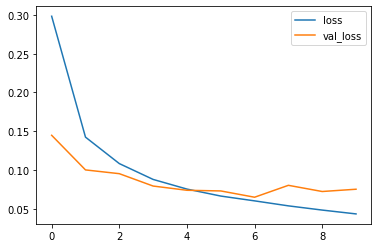

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

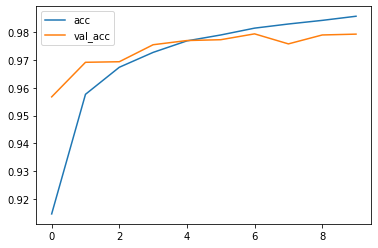

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# NB per migliorare l'accuratezza si può sempre lavorare sulla regularization

In [ ]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9792
[0.07518969476222992, 0.979200005531311]


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 971    0    1    1    0    1    3    1    2    0]
 [   0 1121    4    1    0    1    3    1    4    0]
 [   2    1 1006    5    2    0    2    5    8    1]
 [   1    0    2  982    1    5    0    7    3    9]
 [   1    0    2    1  960    0    4    4    2    8]
 [   2    0    0   10    1  865    2    2    6    4]
 [   3    3    0    1    3    6  940    0    2    0]
 [   2    2    8    0    0    0    0 1009    2    5]
 [   7    1    1    2    3    0    2    7  947    4]
 [   2    2    0    0    6    1    0    6    1  991]]


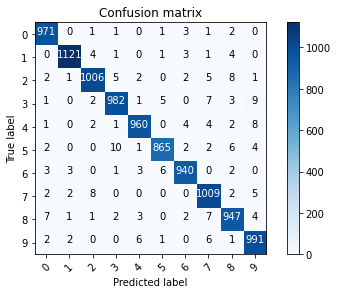

In [ ]:
# Plot confusion matrix

#Ci dice per un label quante predizioni ha ricevuto quel label
#sulla diagonale abbiamo i valori del targhet = predizione 
#avremo anche valori non sulla diagonale che avvengono quando si sbaglia

#Dai risultati si vede che spesso ha sbagliato confondendo 9 con 4 e 7 con 11 e 2
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


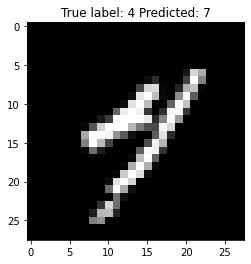

In [ ]:
# Show some misclassified examples

#We can do this using the np.where function, simply returns the index value with
#an input array is true.
#So we can pass in the boolean array p_test not equal to y_test.
#Note that the where function returns two things but we only care about the first thing which is the actual indices.

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
#cmap = gray altrimenti la interpreta diversamente 
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));